# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

In [2]:
# Import data
data=pd.read_csv("Attrition_Data Import.csv")

# Data Preprocessing

In [3]:
# Data Over View
data.head()

,Sr. No.,Code,Tenure,Status,Gender,Edu Bucket,Outstation/Local,Versant Bucket,Language Queue,Experience (Months)
0,82963178,1,264,Attrited,M,Non Science Graduates,Outstation,50-60,Tamil,3
1,82963476,0,134,-,F,Non Science Graduates,Outstation,50-60,Telegu,15
2,82963496,0,192,-,M,Science Graduates,Local,60-70,Malayalam,5
3,82963552,1,34,Attrited,M,Others,Local,60-70,Hindi,14
4,82963672,1,250,Attrited,M,Others,Local,50-60,English,18


In [4]:
# Columns in the Data
data.columns

Index(['Sr. No.', 'Code', 'Tenure', 'Status', 'Gender', 'Edu Bucket',
       'Outstation/Local', 'Versant Bucket', 'Language Queue',
       'Experience (Months)'],
      dtype='object')

- Some column name contain space and '/' in them, this may cause difficulties for data handling
- Replacing spaces and '/' with '_'

In [5]:
# Rename Columns
data.columns=['Sr._No.', 'Code', 'Tenure', 'Status', 'Gender', 'Edu_Bucket',
       'Outstation_Local', 'Versant_Bucket', 'Language_Queue',
       'Experience_Months']

In [6]:
data.head()

,Sr._No.,Code,Tenure,Status,Gender,Edu_Bucket,Outstation_Local,Versant_Bucket,Language_Queue,Experience_Months
0,82963178,1,264,Attrited,M,Non Science Graduates,Outstation,50-60,Tamil,3
1,82963476,0,134,-,F,Non Science Graduates,Outstation,50-60,Telegu,15
2,82963496,0,192,-,M,Science Graduates,Local,60-70,Malayalam,5
3,82963552,1,34,Attrited,M,Others,Local,60-70,Hindi,14
4,82963672,1,250,Attrited,M,Others,Local,50-60,English,18


In [7]:
# Number of rows and column
data.shape

(100, 10)

In [8]:
# Information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr._No.            100 non-null    int64 
 1   Code               100 non-null    int64 
 2   Tenure             100 non-null    int64 
 3   Status             100 non-null    object
 4   Gender             100 non-null    object
 5   Edu_Bucket         100 non-null    object
 6   Outstation_Local   100 non-null    object
 7   Versant_Bucket     100 non-null    object
 8   Language_Queue     100 non-null    object
 9   Experience_Months  100 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 7.9+ KB


In [9]:
# Check for missing value
data.isnull().sum()

Sr._No.              0
Code                 0
Tenure               0
Status               0
Gender               0
Edu_Bucket           0
Outstation_Local     0
Versant_Bucket       0
Language_Queue       0
Experience_Months    0
dtype: int64

- This data set does not contain any null values

In [10]:
data.describe()

,Sr._No.,Code,Tenure,Experience_Months
count,1.000000e+02,100.000000,100.000000,100.000000
mean,8.297256e+07,0.380000,155.640000,12.900000
std,6.556405e+03,0.487832,84.556301,7.661395
min,8.296318e+07,0.000000,15.000000,0.000000
25%,8.296598e+07,0.000000,73.750000,6.000000
50%,8.297213e+07,0.000000,151.000000,13.000000
75%,8.297852e+07,1.000000,231.250000,19.000000
max,8.298268e+07,1.000000,298.000000,25.000000


- For both Tenure and Experience_Months difference between mean and median are not so heigh 
- also minimum, amximum, Q1,Q2,Q3 valuees are well distributed
- So, this two column may not contain any Outlier

Outlire Detection

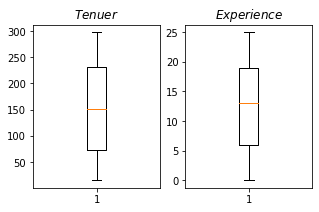

In [11]:
%matplotlib inline
plt.figure(figsize=[5,3])

plt.subplot(1, 2, 1)
plt.boxplot(data.Tenure,)
plt.title('$Tenuer$')

plt.subplot(1, 2, 2)
plt.boxplot(data.Experience_Months)
plt.title('$Experience$')

plt.show()

- So, for both the neumarical column Tenure and Experience_Months there is no outlire

### Chacking classes for categorical data

In [12]:
data.Code.value_counts()

0    62
1    38
Name: Code, dtype: int64

In [13]:
data.Status.value_counts()

-           57
Attrited    43
Name: Status, dtype: int64

#### *Replacing '-' with 'Not Attrited'*

In [14]:
data.loc[(data['Status']=='-'),'Status']='Not Attrited'

In [15]:
data.Status.value_counts()

Not Attrited    57
Attrited        43
Name: Status, dtype: int64

In [16]:
data.Gender.value_counts()

F    53
M    47
Name: Gender, dtype: int64

In [17]:
data.Edu_Bucket.value_counts()

Non Science Graduates    50
Science Graduates        31
Others                   19
Name: Edu_Bucket, dtype: int64

In [18]:
data.Outstation_Local.value_counts()

Local         51
Outstation    49
Name: Outstation_Local, dtype: int64

In [19]:
data.Versant_Bucket.value_counts()

50-60    34
40-50    31
60-70    21
70-80    14
Name: Versant_Bucket, dtype: int64

In [20]:
data.Language_Queue.value_counts()

Tamil        30
Telegu       19
Kannada      14
English      14
Hindi        12
Malayalam    11
Name: Language_Queue, dtype: int64

In [21]:
data.head(5)

,Sr._No.,Code,Tenure,Status,Gender,Edu_Bucket,Outstation_Local,Versant_Bucket,Language_Queue,Experience_Months
0,82963178,1,264,Attrited,M,Non Science Graduates,Outstation,50-60,Tamil,3
1,82963476,0,134,Not Attrited,F,Non Science Graduates,Outstation,50-60,Telegu,15
2,82963496,0,192,Not Attrited,M,Science Graduates,Local,60-70,Malayalam,5
3,82963552,1,34,Attrited,M,Others,Local,60-70,Hindi,14
4,82963672,1,250,Attrited,M,Others,Local,50-60,English,18


# Converting Categorical data into factors

In [22]:
d=data

In [23]:
train=pd.get_dummies(d, columns=['Gender','Edu_Bucket','Outstation_Local','Versant_Bucket','Language_Queue'])

In [24]:
train.head()

,Sr._No.,Code,Tenure,Status,Experience_Months,Gender_F,Gender_M,Edu_Bucket_Non Science Graduates,Edu_Bucket_Others,Edu_Bucket_Science Graduates,...,Versant_Bucket_40-50,Versant_Bucket_50-60,Versant_Bucket_60-70,Versant_Bucket_70-80,Language_Queue_English,Language_Queue_Hindi,Language_Queue_Kannada,Language_Queue_Malayalam,Language_Queue_Tamil,Language_Queue_Telegu
0,82963178,1,264,Attrited,3,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,82963476,0,134,Not Attrited,15,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,82963496,0,192,Not Attrited,5,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,82963552,1,34,Attrited,14,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,82963672,1,250,Attrited,18,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [25]:
train.columns

Index(['Sr._No.', 'Code', 'Tenure', 'Status', 'Experience_Months', 'Gender_F',
       'Gender_M', 'Edu_Bucket_Non Science Graduates', 'Edu_Bucket_Others',
       'Edu_Bucket_Science Graduates', 'Outstation_Local_Local',
       'Outstation_Local_Outstation', 'Versant_Bucket_40-50',
       'Versant_Bucket_50-60', 'Versant_Bucket_60-70', 'Versant_Bucket_70-80',
       'Language_Queue_English', 'Language_Queue_Hindi',
       'Language_Queue_Kannada', 'Language_Queue_Malayalam',
       'Language_Queue_Tamil', 'Language_Queue_Telegu'],
      dtype='object')

In [26]:
X_train=train.drop(columns=['Code','Status'])

In [27]:
X_train.head()

,Sr._No.,Tenure,Experience_Months,Gender_F,Gender_M,Edu_Bucket_Non Science Graduates,Edu_Bucket_Others,Edu_Bucket_Science Graduates,Outstation_Local_Local,Outstation_Local_Outstation,Versant_Bucket_40-50,Versant_Bucket_50-60,Versant_Bucket_60-70,Versant_Bucket_70-80,Language_Queue_English,Language_Queue_Hindi,Language_Queue_Kannada,Language_Queue_Malayalam,Language_Queue_Tamil,Language_Queue_Telegu
0,82963178,264,3,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,82963476,134,15,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,82963496,192,5,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0
3,82963552,34,14,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
4,82963672,250,18,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0


In [28]:
X_train.shape

(100, 20)

In [29]:
y_train=train["Code"].values

In [30]:
y_train

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

# Prossing Test data set

In [31]:
test=pd.read_csv("Validation Set.csv")

In [32]:
test.head()

,Sr. No.,Code,Tenure,Status,Gender,Edu Bucket,Outstation/Local,Versant Bucket,Language Queue,Experience (Months)
0,85484450,NaN,115,-,M,Science Graduates,Local,60-70,Tamil,10
1,85484454,NaN,12,-,F,Non Science Graduates,Local,60-70,Kannada,18
2,85484456,NaN,30,-,F,Science Graduates,Local,50-60,Kannada,13
3,85484466,NaN,100,-,F,Science Graduates,Outstation,70-80,Tamil,20
4,85484476,NaN,15,-,M,Non Science Graduates,Local,40-50,Telegu,10


In [33]:
# Columns in the Data
test.columns

Index(['Sr. No.', 'Code', 'Tenure', 'Status', 'Gender', 'Edu Bucket',
       'Outstation/Local', 'Versant Bucket', 'Language Queue',
       'Experience (Months)'],
      dtype='object')

- Some column name contain space and '/' in them, this may cause difficulties for data handling
- Replacing spaces and '/' with '_'

In [34]:
# Rename Columns
test.columns=['Sr._No.', 'Code', 'Tenure', 'Status', 'Gender', 'Edu_Bucket',
       'Outstation_Local', 'Versant_Bucket', 'Language_Queue',
       'Experience_Months']

In [35]:
test.head()

,Sr._No.,Code,Tenure,Status,Gender,Edu_Bucket,Outstation_Local,Versant_Bucket,Language_Queue,Experience_Months
0,85484450,NaN,115,-,M,Science Graduates,Local,60-70,Tamil,10
1,85484454,NaN,12,-,F,Non Science Graduates,Local,60-70,Kannada,18
2,85484456,NaN,30,-,F,Science Graduates,Local,50-60,Kannada,13
3,85484466,NaN,100,-,F,Science Graduates,Outstation,70-80,Tamil,20
4,85484476,NaN,15,-,M,Non Science Graduates,Local,40-50,Telegu,10


In [36]:
# Number of rows and column
test.shape

(60, 10)

In [37]:
# Information 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr._No.            60 non-null     int64  
 1   Code               0 non-null      float64
 2   Tenure             60 non-null     int64  
 3   Status             60 non-null     object 
 4   Gender             60 non-null     object 
 5   Edu_Bucket         60 non-null     object 
 6   Outstation_Local   60 non-null     object 
 7   Versant_Bucket     60 non-null     object 
 8   Language_Queue     60 non-null     object 
 9   Experience_Months  60 non-null     int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 4.8+ KB


In [38]:
# Check for missing value
test.isnull().sum()

Sr._No.               0
Code                 60
Tenure                0
Status                0
Gender                0
Edu_Bucket            0
Outstation_Local      0
Versant_Bucket        0
Language_Queue        0
Experience_Months     0
dtype: int64

- This data set does not contain any null values

In [39]:
test.describe()

,Sr._No.,Code,Tenure,Experience_Months
count,6.000000e+01,0.0,60.000000,60.000000
mean,8.548565e+07,NaN,60.716667,12.500000
std,8.502409e+02,NaN,37.906259,7.284765
min,8.548445e+07,NaN,1.000000,0.000000
25%,8.548489e+07,NaN,29.250000,6.000000
50%,8.548556e+07,NaN,55.000000,13.500000
75%,8.548649e+07,NaN,97.750000,18.000000
max,8.548705e+07,NaN,120.000000,24.000000


- For both Tenure and Experience_Months difference between mean and median are not so heigh 
- also minimum, amximum, Q1,Q2,Q3 valuees are well distributed
- So, this two column may not contain any Outlier

Outlire Detection

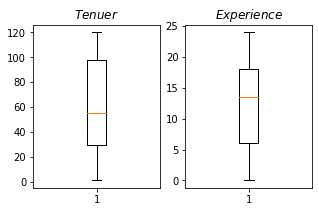

In [40]:
%matplotlib inline
plt.figure(figsize=[5,3])

plt.subplot(1, 2, 1)
plt.boxplot(test.Tenure,)
plt.title('$Tenuer$')

plt.subplot(1, 2, 2)
plt.boxplot(test.Experience_Months)
plt.title('$Experience$')

plt.show()

- So, for both the neumarical column Tenure and Experience_Months there is no outlire

### Chacking classes for categorical data

In [41]:
test.Status.value_counts()

-    60
Name: Status, dtype: int64

#### *Replacing '-' with 'Not Attrited'*

In [42]:
test.loc[(test['Status']=='-'),'Status']=0

In [43]:
test.Status.value_counts()

0    60
Name: Status, dtype: int64

In [44]:
test.Gender.value_counts()

M    31
F    29
Name: Gender, dtype: int64

In [45]:
test.Edu_Bucket.value_counts()

Science Graduates        29
Non Science Graduates    25
Others                    6
Name: Edu_Bucket, dtype: int64

In [46]:
test.Outstation_Local.value_counts()

Local         31
Outstation    29
Name: Outstation_Local, dtype: int64

In [47]:
test.Versant_Bucket.value_counts()

50-60    23
40-50    17
70-80    10
60-70    10
Name: Versant_Bucket, dtype: int64

In [48]:
test.Language_Queue.value_counts()

Kannada      25
Tamil        17
Telegu        7
Malayalam     6
Hindi         3
English       2
Name: Language_Queue, dtype: int64

In [49]:
test.shape

(60, 10)

# Converting Categorical data into factors

In [50]:
d1=test

In [51]:
test1=pd.get_dummies(d1, columns=['Gender','Edu_Bucket','Outstation_Local','Versant_Bucket','Language_Queue'])

In [52]:
test1.shape

(60, 22)

In [53]:
test1.columns

Index(['Sr._No.', 'Code', 'Tenure', 'Status', 'Experience_Months', 'Gender_F',
       'Gender_M', 'Edu_Bucket_Non Science Graduates', 'Edu_Bucket_Others',
       'Edu_Bucket_Science Graduates', 'Outstation_Local_Local',
       'Outstation_Local_Outstation', 'Versant_Bucket_40-50',
       'Versant_Bucket_50-60', 'Versant_Bucket_60-70', 'Versant_Bucket_70-80',
       'Language_Queue_English', 'Language_Queue_Hindi',
       'Language_Queue_Kannada', 'Language_Queue_Malayalam',
       'Language_Queue_Tamil', 'Language_Queue_Telegu'],
      dtype='object')

In [54]:
X_test=test1.drop(columns=['Code','Status'])

In [55]:
X_test.head()

,Sr._No.,Tenure,Experience_Months,Gender_F,Gender_M,Edu_Bucket_Non Science Graduates,Edu_Bucket_Others,Edu_Bucket_Science Graduates,Outstation_Local_Local,Outstation_Local_Outstation,Versant_Bucket_40-50,Versant_Bucket_50-60,Versant_Bucket_60-70,Versant_Bucket_70-80,Language_Queue_English,Language_Queue_Hindi,Language_Queue_Kannada,Language_Queue_Malayalam,Language_Queue_Tamil,Language_Queue_Telegu
0,85484450,115,10,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
1,85484454,12,18,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,85484456,30,13,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0
3,85484466,100,20,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
4,85484476,15,10,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [56]:
X_test.shape

(60, 20)

In [57]:
test1.columns

Index(['Sr._No.', 'Code', 'Tenure', 'Status', 'Experience_Months', 'Gender_F',
       'Gender_M', 'Edu_Bucket_Non Science Graduates', 'Edu_Bucket_Others',
       'Edu_Bucket_Science Graduates', 'Outstation_Local_Local',
       'Outstation_Local_Outstation', 'Versant_Bucket_40-50',
       'Versant_Bucket_50-60', 'Versant_Bucket_60-70', 'Versant_Bucket_70-80',
       'Language_Queue_English', 'Language_Queue_Hindi',
       'Language_Queue_Kannada', 'Language_Queue_Malayalam',
       'Language_Queue_Tamil', 'Language_Queue_Telegu'],
      dtype='object')

In [58]:
y_test=test1['Status'].values

In [59]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

# Modeling: Classification

## Logistic Regression

In [60]:
# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [61]:
lr=LogisticRegression()

In [62]:
model=lr.fit(X_train,y_train)

In [63]:
y_pred=lr.predict(X_test)

In [64]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
lr.predict_proba(X_test)

array([[0.62347745, 0.37652255],
       [0.62347745, 0.37652255],
       [0.62347746, 0.37652254],
       [0.62347747, 0.37652253],
       [0.62347748, 0.37652252],
       [0.6234775 , 0.3765225 ],
       [0.62347753, 0.37652247],
       [0.62347755, 0.37652245],
       [0.62347761, 0.37652239],
       [0.62347763, 0.37652237],
       [0.62347765, 0.37652235],
       [0.62347766, 0.37652234],
       [0.62347783, 0.37652217],
       [0.62347803, 0.37652197],
       [0.62347803, 0.37652197],
       [0.62347806, 0.37652194],
       [0.62347809, 0.37652191],
       [0.62347812, 0.37652188],
       [0.62347819, 0.37652181],
       [0.62347824, 0.37652176],
       [0.62347845, 0.37652155],
       [0.62347855, 0.37652145],
       [0.62347874, 0.37652126],
       [0.62347883, 0.37652117],
       [0.62347887, 0.37652113],
       [0.62347887, 0.37652113],
       [0.62347887, 0.37652113],
       [0.62347892, 0.37652108],
       [0.62347895, 0.37652105],
       [0.62347896, 0.37652104],
       [0.

In [66]:
predicted=pd.DataFrame()
predicted["Actual"]=y_test
predicted['Predicted']=y_pred

In [67]:
predicted.head(2)

,Actual,Predicted
0,0,0
1,0,0


# confusion matrix

In [68]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [69]:
v=y_test.astype(np.int)

In [70]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
cm=confusion_matrix(v,y_pred)

In [73]:
cmdf = pd.DataFrame(cm)

cmdf

,0
0,60


# Decisiontree Classifire

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
d_tree=DecisionTreeClassifier(random_state = 100)
model1=d_tree.fit(X_train, y_train)

In [76]:
type(model1)

sklearn.tree._classes.DecisionTreeClassifier

In [77]:
X_test.head(2)

,Sr._No.,Tenure,Experience_Months,Gender_F,Gender_M,Edu_Bucket_Non Science Graduates,Edu_Bucket_Others,Edu_Bucket_Science Graduates,Outstation_Local_Local,Outstation_Local_Outstation,Versant_Bucket_40-50,Versant_Bucket_50-60,Versant_Bucket_60-70,Versant_Bucket_70-80,Language_Queue_English,Language_Queue_Hindi,Language_Queue_Kannada,Language_Queue_Malayalam,Language_Queue_Tamil,Language_Queue_Telegu
0,85484450,115,10,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
1,85484454,12,18,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0


In [78]:
pred=d_tree.predict(X_test)

In [79]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Naive Bayes Classification

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
nb=GaussianNB()

In [82]:
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [83]:
y_pred=nb.predict(X_test)

In [84]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])